In [1]:
%config Completer.use_jedi = False

In [7]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
iris = load_iris()

In [8]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, iris.target, columns=columns)

In [10]:
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
0,4.9,3.0,1.4,0.2,0
0,4.7,3.2,1.3,0.2,0
0,4.6,3.1,1.5,0.2,0
0,5.0,3.6,1.4,0.2,0


Text(0,0.5,'sepal_width')

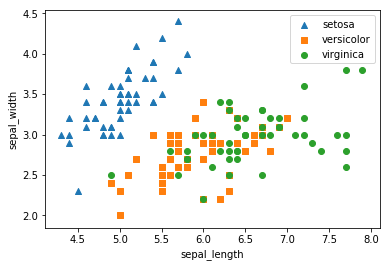

In [13]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')


### PCA를 위해서는 Scaling이 필요하다. 
- feature의 scale에 영향을 받기 때문이다. StandardScaler를 사용해준다.

In [14]:
from sklearn.preprocessing import StandardScaler

In [16]:
iris_sclaed = StandardScaler().fit_transform(irisDF)

/Users/sanghyub/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/sanghyub/anaconda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
# iris data의 feature를 2개로 줄일 것이다.
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [18]:
pca.fit(iris_sclaed)
iris_pca = pca.transform(iris_sclaed)
print(iris_pca.shape)

(150, 2)


In [20]:
iris_pca

array([[-2.57612023,  0.47449927],
       [-2.41532249, -0.67809197],
       [-2.65933256, -0.34828193],
       [-2.60199054, -0.60330594],
       [-2.68374418,  0.6402204 ],
       [-2.41219305,  1.48486231],
       [-2.72650791,  0.04037433],
       [-2.54754039,  0.21784304],
       [-2.63111739, -1.12151504],
       [-2.50568834, -0.47375311],
       [-2.49309024,  1.03899203],
       [-2.62658449,  0.12690795],
       [-2.53463285, -0.73367377],
       [-2.89043509, -0.96998871],
       [-2.52492662,  1.85524436],
       [-2.57661201,  2.68047277],
       [-2.52724177,  1.47833344],
       [-2.51071301,  0.48379741],
       [-2.26217005,  1.40241037],
       [-2.64311325,  1.12144398],
       [-2.27440347,  0.40624212],
       [-2.52398522,  0.91873733],
       [-3.01440545,  0.44855689],
       [-2.18617043,  0.08328077],
       [-2.54029796,  0.1318046 ],
       [-2.30389499, -0.62854387],
       [-2.38796377,  0.23807154],
       [-2.49345491,  0.52241515],
       [-2.46849629,

In [22]:
pca_columns = ['pca_component_1','pca_component_2']
iris_df_pca = pd.DataFrame(iris_pca, columns=pca_columns)

In [24]:
iris_df_pca['target'] = iris.target

In [25]:
iris_df_pca

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0
5,-2.412193,1.484862,0
6,-2.726508,0.040374,0
7,-2.547540,0.217843,0
8,-2.631117,-1.121515,0
9,-2.505688,-0.473753,0


#### 오히려 이전 보다 구분이 더 잘되는 모습이다.

Text(0,0.5,'pca_component_2')

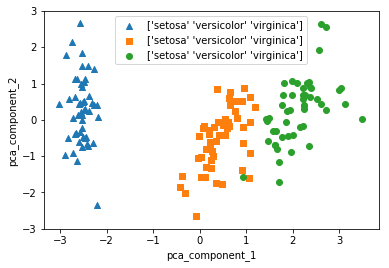

In [27]:
markers = ['^','s','o']
for i, marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names)
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')


In [30]:
# pca후 특성의 분산의 합은 95%로 높은 편이다. 5%가 손실 되었지만 분류가 아주 잘되었다.
print(pca.explained_variance_ratio_)
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

[0.76740358 0.18282727]


0.9502308529408712

### RandomForest를 이용한 분류성능 비교

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring = 'accuracy', cv = 3)
print(scores)

[0.98039216 0.92156863 0.97916667]


/Users/sanghyub/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sanghyub/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sanghyub/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
pca_X = iris_df_pca[['pca_component_1', 'pca_component_2']]

In [48]:
scores = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy',cv=3)
print(scores)

[0.96078431 1.         1.        ]


/Users/sanghyub/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sanghyub/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sanghyub/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


pca하기 전보다 성능이 더 좋아진 것을 확인할 수 있다.

### German Credit Card data로 실습


In [58]:
df = pd.read_excel('inputs/credit_card.xls', sheet_name='Data')
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [59]:
df.rename(columns = {'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

feature들간의 선형적인 상관관계가 매우 높은 것을 확인할 수 있다.

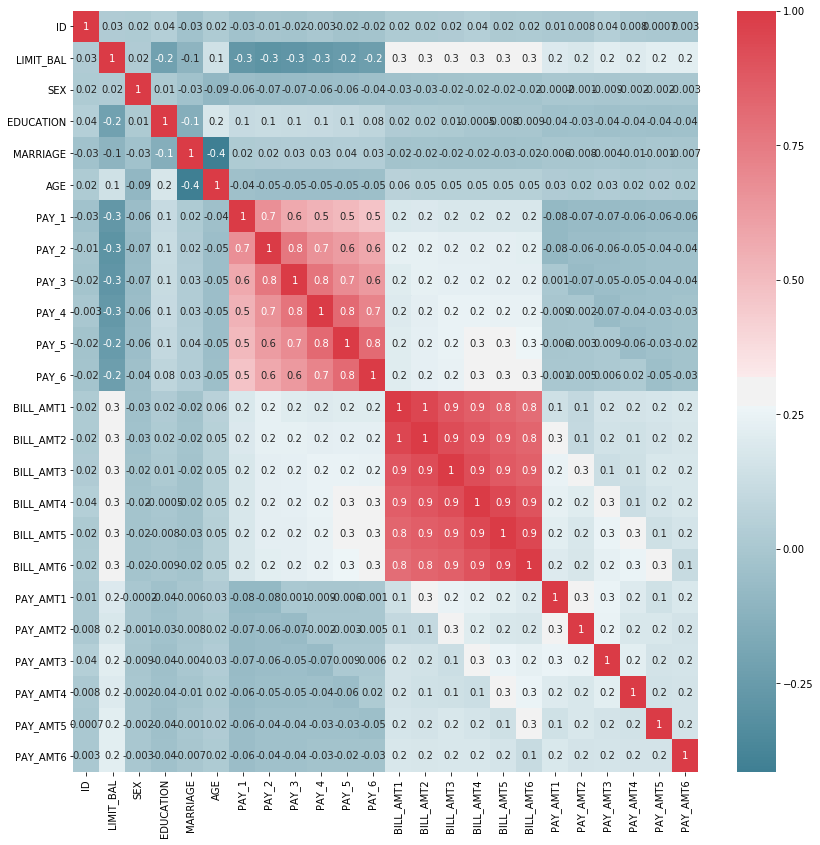

In [61]:
import seaborn as sns
corr = X_features.corr()
plt.figure(figsize = (14,14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, fmt='.1g')

In [62]:
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('features : ',cols_bill)

scaler = StandardScaler()

features :  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [63]:
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA per Components Variance:', pca.explained_variance_ratio_)

PCA per Components Variance: [0.90555253 0.0509867 ]


/Users/sanghyub/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/sanghyub/anaconda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


95%정도를 설명할 수 있다.

In [79]:
import timeit
import numpy as np

In [72]:
rcf = RandomForestClassifier(n_estimators=300, random_state=156)

In [80]:
start = timeit.default_timer()
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=5 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))
stop = timeit.default_timer()
print(stop-start)

CV=3 인 경우의 개별 Fold세트별 정확도: [0.80603233 0.80783333 0.82166667 0.83016667 0.81780297]
평균 정확도:0.8167
87.63603669999975


In [ ]:
# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)

In [82]:
start = timeit.default_timer()
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=5)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))
stop = timeit.default_timer()
print(stop-start)

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.78386936 0.79366667 0.7985     0.80983333 0.79613269]
PCA 변환 데이터 셋 평균 정확도:0.7964
81.00842164800088


pca 후 결과를 보면 성능이 조금 감소했지만, pca의 압축으로 인해 속도가 더 빠르다는 것을 확인할 수 있다.  
성능 vs 시간